In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [3]:
# File to Load
mouse_data_to_load = "data/mouse_drug_data.csv"
trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_data_to_load)
trial_data = pd.read_csv(trial_data_to_load)

drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
mouse_data_filtered = mouse_data.loc[mouse_data['Drug'].isin(drug_list)]

alldata = pd.merge(mouse_data_filtered, trial_data, how='inner',on="Mouse ID")

alldata.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_grouped = alldata.groupby(['Drug','Timepoint'])

tumor_vol_avg = drug_grouped["Tumor Volume (mm3)"].mean()
tumor_vol_sem = drug_grouped["Tumor Volume (mm3)"].sem()
metastatic_avg = drug_grouped["Metastatic Sites"].mean()
metastatic_sem = drug_grouped["Metastatic Sites"].sem()
count = drug_grouped["Mouse ID"].count()

# Convert to DataFrame
                                                          
drug_grouped_df = pd.DataFrame({"Tumor Vol Avg":tumor_vol_avg,
                                "Tumor Vol Standard Err":tumor_vol_sem,
                                "Metastatic Sites Avg":metastatic_avg,
                                "Metastatic Sites Standard Err":metastatic_sem,
                                "Survival Rate":((count/25)*100)
                               })

drug_grouped_df = drug_grouped_df.reset_index()

# Preview DataFrame
drug_grouped_df.head(10)                                             


,Drug,Timepoint,Tumor Vol Avg,Tumor Vol Standard Err,Metastatic Sites Avg,Metastatic Sites Standard Err,Survival Rate
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,100.0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,100.0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,100.0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,96.0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,92.0
5,Capomulin,25,39.939528,0.881642,0.818182,0.181818,88.0
6,Capomulin,30,38.769339,0.934460,1.090909,0.172944,88.0
7,Capomulin,35,37.816839,1.052241,1.181818,0.169496,88.0
8,Capomulin,40,36.958001,1.223608,1.380952,0.175610,84.0
9,Capomulin,45,36.236114,1.223977,1.476190,0.202591,84.0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

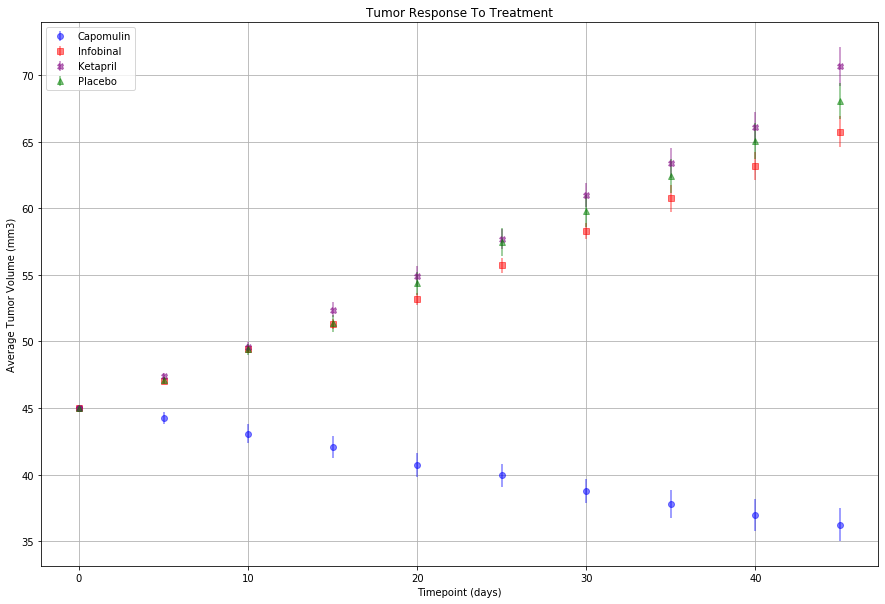

In [19]:


capomulin_df = drug_grouped_df[drug_grouped_df["Drug"] == "Capomulin"]
infobinal_df = drug_grouped_df[drug_grouped_df["Drug"] == "Infubinol"] 
ketapril_df = drug_grouped_df[drug_grouped_df["Drug"] == "Ketapril"] 
placebo_df = drug_grouped_df[drug_grouped_df["Drug"] == "Placebo"] 

fig, ax = plt.subplots() 

ax.errorbar(capomulin_df["Timepoint"],capomulin_df["Tumor Vol Avg"], yerr=capomulin_df["Tumor Vol Standard Err"], fmt= "o", color = "blue", label = "Capomulin", alpha=0.5)
ax.errorbar(infobinal_df["Timepoint"],infobinal_df["Tumor Vol Avg"], yerr=infobinal_df["Tumor Vol Standard Err"], fmt= "s", color = "red", label = "Infobinal", alpha=0.5)   
ax.errorbar(ketapril_df["Timepoint"],ketapril_df["Tumor Vol Avg"], yerr=ketapril_df["Tumor Vol Standard Err"], fmt= "X", color = "purple", label = "Ketapril", alpha=0.5) 
ax.errorbar(placebo_df["Timepoint"],placebo_df["Tumor Vol Avg"], yerr=placebo_df["Tumor Vol Standard Err"], fmt= "^", color = "green", label = "Placebo", alpha=0.5) 

# This sets size-- .gcf refers to the current plt instance
plt.gcf().set_size_inches(15, 10)

plt.legend(loc="best")
plt.grid(True)
plt.title("Tumor Response To Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")

## Metastatic Response to Treatment

Text(0, 0.5, 'Average Metastatic Sites')

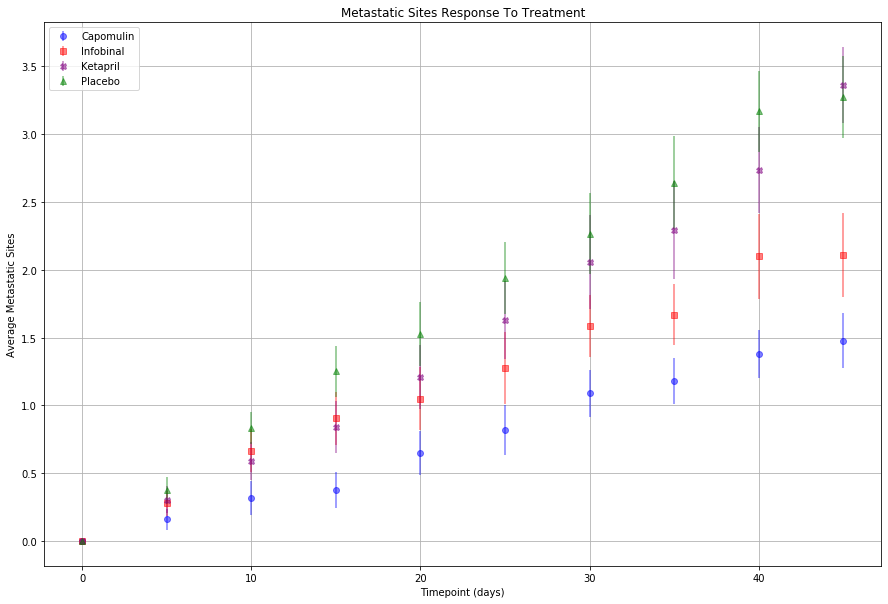

In [20]:
fig, ax = plt.subplots() 

ax.errorbar(capomulin_df["Timepoint"],capomulin_df["Metastatic Sites Avg"], yerr=capomulin_df["Metastatic Sites Standard Err"], fmt= "o", color = "blue", label = "Capomulin", alpha=0.5)
ax.errorbar(infobinal_df["Timepoint"],infobinal_df["Metastatic Sites Avg"], yerr=infobinal_df["Metastatic Sites Standard Err"], fmt= "s", color = "red", label = "Infobinal", alpha=0.5)   
ax.errorbar(ketapril_df["Timepoint"],ketapril_df["Metastatic Sites Avg"], yerr=ketapril_df["Metastatic Sites Standard Err"], fmt= "X", color = "purple", label = "Ketapril", alpha=0.5) 
ax.errorbar(placebo_df["Timepoint"],placebo_df["Metastatic Sites Avg"], yerr=placebo_df["Metastatic Sites Standard Err"], fmt= "^", color = "green", label = "Placebo", alpha=0.5) 

# This sets size-- .gcf refers to the current plt instance
plt.gcf().set_size_inches(15, 10)

plt.legend(loc="best")
plt.grid(True)
plt.title("Metastatic Sites Response To Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Metastatic Sites")

## Survival Rates

Text(0, 0.5, 'Survival Rate (%)')

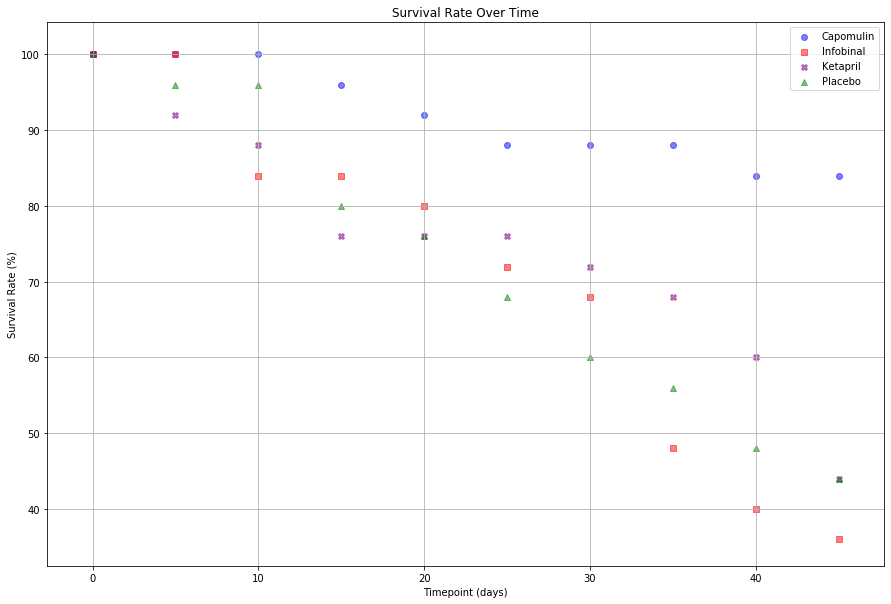

In [21]:
plt.scatter(capomulin_df["Timepoint"],capomulin_df["Survival Rate"], marker= "o", color = "blue", label = "Capomulin", alpha=0.5)
plt.scatter(infobinal_df["Timepoint"],infobinal_df["Survival Rate"], marker= "s", color = "red", label = "Infobinal", alpha=0.5)   
plt.scatter(ketapril_df["Timepoint"],ketapril_df["Survival Rate"], marker= "X", color = "purple", label = "Ketapril", alpha=0.5) 
plt.scatter(placebo_df["Timepoint"],placebo_df["Survival Rate"], marker= "^", color = "green", label = "Placebo", alpha=0.5) 

# This sets size-- .gcf refers to the current plt instance
plt.gcf().set_size_inches(15, 10)

plt.legend(loc="best")
plt.grid(True)
plt.title("Survival Rate Over Time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Survival Rate (%)")

## Summary Bar Graph

In [22]:
capomulin_df.head(30)

,Drug,Timepoint,Tumor Vol Avg,Tumor Vol Standard Err,Metastatic Sites Avg,Metastatic Sites Standard Err,Survival Rate
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000,100.0
1,Capomulin,5,44.266086,0.448593,0.160000,0.074833,100.0
2,Capomulin,10,43.084291,0.702684,0.320000,0.125433,100.0
3,Capomulin,15,42.064317,0.838617,0.375000,0.132048,96.0
4,Capomulin,20,40.716325,0.909731,0.652174,0.161621,92.0
5,Capomulin,25,39.939528,0.881642,0.818182,0.181818,88.0
6,Capomulin,30,38.769339,0.934460,1.090909,0.172944,88.0
7,Capomulin,35,37.816839,1.052241,1.181818,0.169496,88.0
8,Capomulin,40,36.958001,1.223608,1.380952,0.175610,84.0
9,Capomulin,45,36.236114,1.223977,1.476190,0.202591,84.0


In [23]:
c_change = ((capomulin_df.iloc[9,2] - capomulin_df.iloc[0,2])/capomulin_df.iloc[0,2])*100
i_change = ((infobinal_df.iloc[9,2] - infobinal_df.iloc[0,2])/infobinal_df.iloc[0,2])*100
k_change = ((ketapril_df.iloc[9,2] - ketapril_df.iloc[0,2])/ketapril_df.iloc[0,2])*100
p_change = ((placebo_df.iloc[9,2] - placebo_df.iloc[0,2])/placebo_df.iloc[0,2])*100

tumor_change = [c_change, i_change, k_change, p_change]
tumor_bar_df = pd.DataFrame(tumor_change, columns=['% Change in Tumors'], index=drug_list)
tumor_bar_df['colors'] = 'r'
tumor_bar_df.loc[tumor_bar_df['% Change in Tumors']<=0,'colors'] = 'g'

tumor_bar_df.head()

,% Change in Tumors,colors
Capomulin,-19.475303,g
Infubinol,46.123472,r
Ketapril,57.028795,r
Placebo,51.297960,r


(-34.47530266789417, 72.02879468660608)

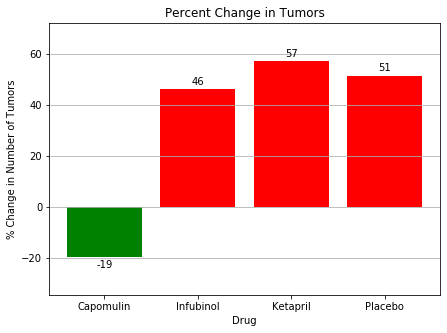

In [24]:
fig, ax = plt.subplots()
rects = ax.bar(tumor_bar_df.index, tumor_bar_df['% Change in Tumors'], color=tumor_bar_df['colors'])


# add some text for labels, title and axes ticks
ax.set_ylabel("% Change in Number of Tumors")
ax.set_xlabel("Drug")
ax.set_title("Percent Change in Tumors")

plt.gcf().set_size_inches(7, 5)
plt.grid(True, axis = 'y')
plt.ylim((min(tumor_bar_df['% Change in Tumors'])-15), (max(tumor_bar_df['% Change in Tumors'])+15))


def autolabel(rects, ax):
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in rects:
        height = rect.get_height()
        label_position = (height + (y_height * 0.01)) if height >= 0  else (height - (y_height * 0.05))

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects, ax)

plt.ylim((min(tumor_bar_df['% Change in Tumors'])-15), (max(tumor_bar_df['% Change in Tumors'])+15))



